# Unsupervised Learning

### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore", 
    message="KMeans is known to have a memory leak on Windows with MKL")

### 2. Load and Prepare Data

In [2]:
df = pd.read_csv('Mall_Customers.csv')

# Select features for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 3. Apply K-Means (k=5)

In [3]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)
df['KMeans_Cluster'] = kmeans_labels

print("K-Means Clusters:")
print(df['KMeans_Cluster'].value_counts().sort_index())

K-Means Clusters:
KMeans_Cluster
0    20
1    54
2    40
3    39
4    47
Name: count, dtype: int64


### 4. Apply DBSCAN

In [4]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
df['DBSCAN_Cluster'] = dbscan_labels

print("\nDBSCAN Clusters (-1 = noise):")
print(df['DBSCAN_Cluster'].value_counts().sort_index())


DBSCAN Clusters (-1 = noise):
DBSCAN_Cluster
-1    60
 0    17
 1     5
 2    51
 3    28
 4    32
 5     7
Name: count, dtype: int64


### 5. Plot: Income vs Spending Score

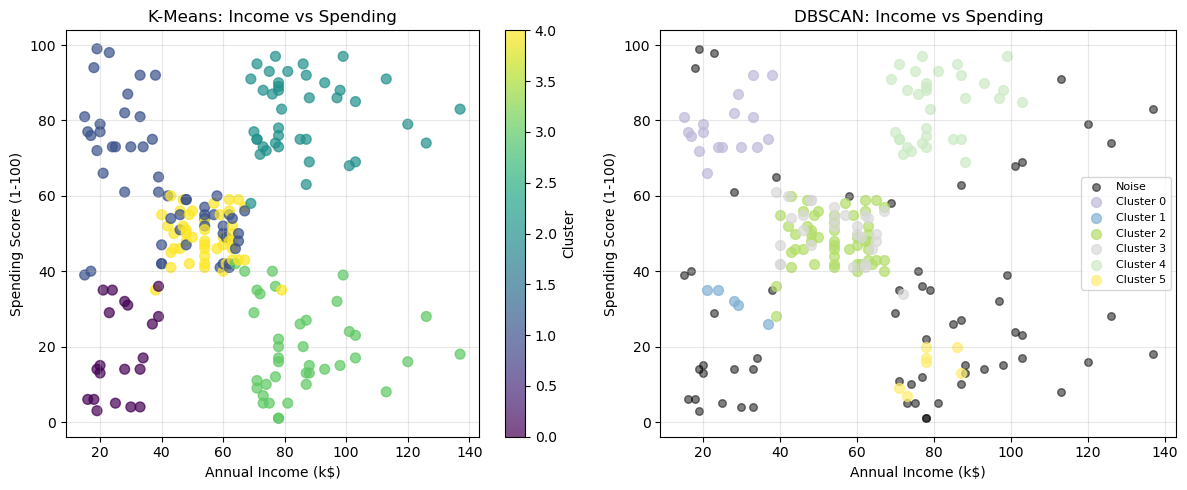

In [5]:
plt.figure(figsize=(12, 5))

# K-Means plot
plt.subplot(1, 2, 1)
scatter = plt.scatter(df['Annual Income (k$)'], 
                      df['Spending Score (1-100)'], 
                      c=df['KMeans_Cluster'], 
                      cmap='viridis', 
                      s=50, 
                      alpha=0.7)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means: Income vs Spending')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)

# DBSCAN plot
plt.subplot(1, 2, 2)
unique_clusters = np.unique(dbscan_labels)
colors = plt.cm.Set3(np.linspace(0, 1, len(unique_clusters)))

for i, cluster in enumerate(unique_clusters):
    mask = dbscan_labels == cluster
    if cluster == -1:
        plt.scatter(df.loc[mask, 'Annual Income (k$)'], 
                   df.loc[mask, 'Spending Score (1-100)'], 
                   c='black', s=30, alpha=0.5, label='Noise')
    else:
        plt.scatter(df.loc[mask, 'Annual Income (k$)'], 
                   df.loc[mask, 'Spending Score (1-100)'], 
                   c=[colors[i]], s=50, alpha=0.7, label=f'Cluster {cluster}')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('DBSCAN: Income vs Spending')
plt.legend(fontsize=8)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 6. Plot: Age vs Spending Score

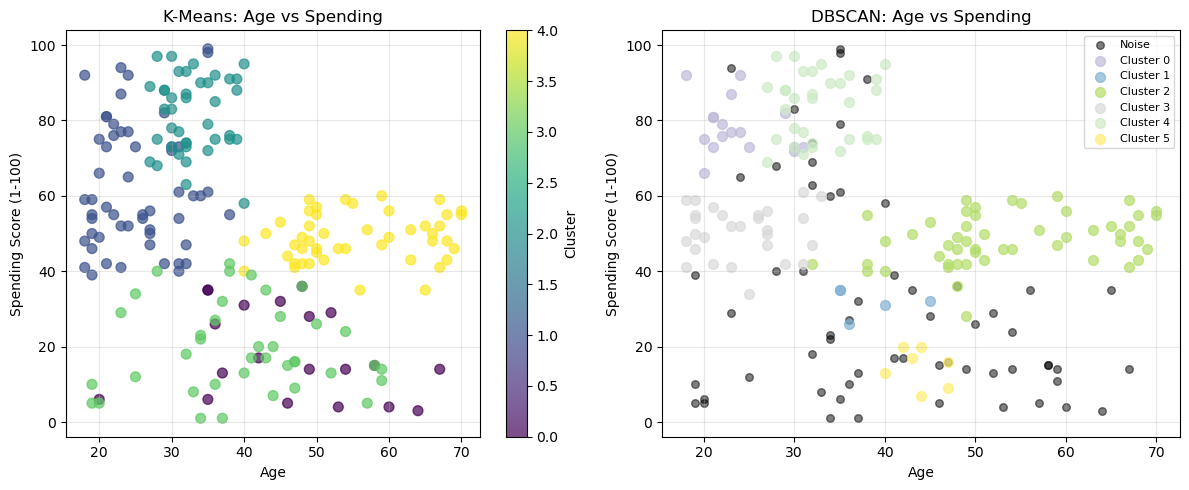

In [6]:
plt.figure(figsize=(12, 5))

# K-Means plot
plt.subplot(1, 2, 1)
scatter = plt.scatter(df['Age'], 
                      df['Spending Score (1-100)'], 
                      c=df['KMeans_Cluster'], 
                      cmap='viridis', 
                      s=50, 
                      alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means: Age vs Spending')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)

# DBSCAN plot
plt.subplot(1, 2, 2)
for i, cluster in enumerate(unique_clusters):
    mask = dbscan_labels == cluster
    if cluster == -1:
        plt.scatter(df.loc[mask, 'Age'], 
                   df.loc[mask, 'Spending Score (1-100)'], 
                   c='black', s=30, alpha=0.5, label='Noise')
    else:
        plt.scatter(df.loc[mask, 'Age'], 
                   df.loc[mask, 'Spending Score (1-100)'], 
                   c=[colors[i]], s=50, alpha=0.7, label=f'Cluster {cluster}')

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('DBSCAN: Age vs Spending')
plt.legend(fontsize=8)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 7. Quick Cluster Summary

In [7]:
print("\n" + "="*40)
print("QUICK CLUSTER SUMMARY")
print("="*40)

print("\nK-Means Cluster Centers (original scale):")
centroids_original = scaler.inverse_transform(kmeans.cluster_centers_)
centroids_df = pd.DataFrame(centroids_original, 
                           columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
print(centroids_df)

print("\nDBSCAN Summary:")
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)
print(f"Clusters found: {n_clusters}")
print(f"Noise points: {n_noise}")


QUICK CLUSTER SUMMARY

K-Means Cluster Centers (original scale):
         Age  Annual Income (k$)  Spending Score (1-100)
0  46.250000           26.750000               18.350000
1  25.185185           41.092593               62.240741
2  32.875000           86.100000               81.525000
3  39.871795           86.102564               19.358974
4  55.638298           54.382979               48.851064

DBSCAN Summary:
Clusters found: 6
Noise points: 60
